In [2]:
from helpers.ihf import show_ihf
show_ihf()

### Innholdsfortegnelse

- [Matplotlib grunnkurs](./_matplotlib_grunnkurs.ipynb)
- [Subplots](./subplots.ipynb)
- [2D data](./2d_data.ipynb)
- [Interaktive plots](./interaktive_plots.ipynb)

# Subplots

En ryddigere måte å organisere koden på enn å bare plotte alt direkte er å lage figurer og subplots. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Dette kan gjøres på mange måter, men en svært vanlig en er å bruke `plt.subplots()`. I jupyter notebooks dukker plottet opp av seg selv i den cellen det opprettes i. 

Jeg foretrekker selv å alltid lage hele figuren i en celle selv om databehandlingen gjerne skjer over flere. Dersom dere foretrekker å gjøre dette over flere celler kan dere hente den vise den enten ved `plt.show()` eller `fig.show()`.

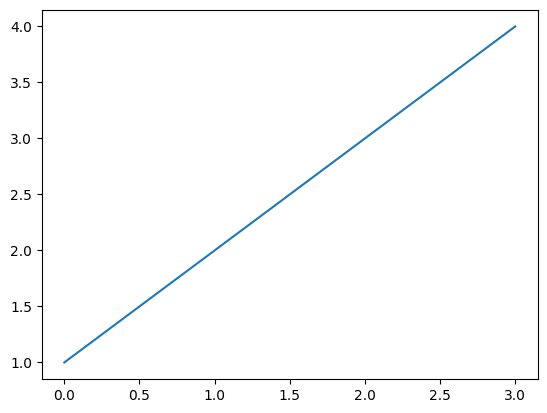

In [4]:
fig, ax = plt.subplots()
plt.plot([1, 2, 3, 4])
# fig.show()

Mange ganger vil vi også ha flere plots i samme figur. Da kan dere sende inn dimensjonene dere ønsker til `plt.subplots()`. Dere får ut en 2d-liste med samme dimensjoner. 

For en 2x3 grid med plots blir det som følger:

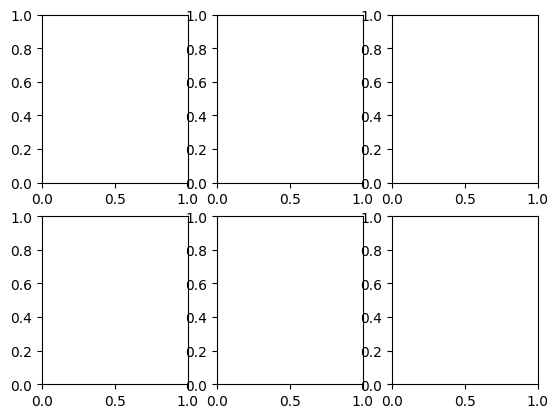

In [5]:
fig, axs = plt.subplots(2, 3)

Denne listen kan pakkes ut til et sett med variabler om det er ønskelig

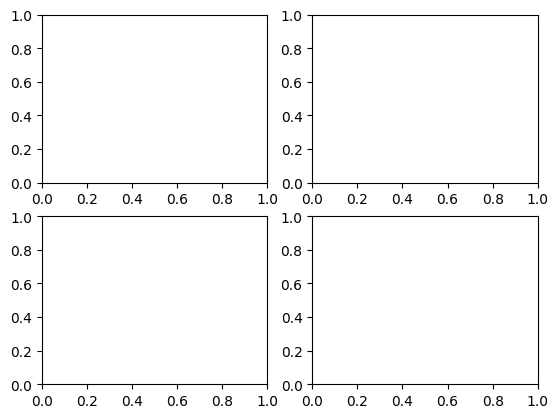

In [6]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)

, eller indekseres som en hvilken som helst annen 2D-liste

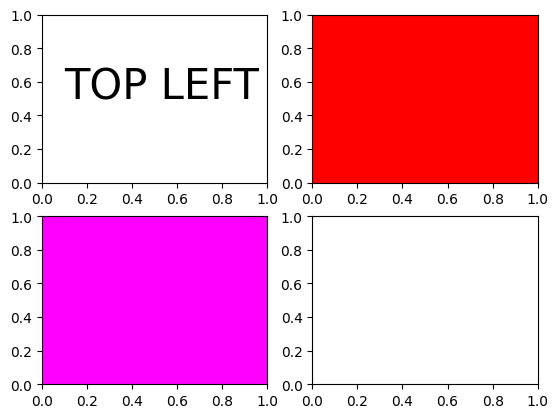

In [18]:
fig, axs = plt.subplots(2, 2)
axs[0][0].annotate("TOP LEFT", (0.1, 0.5), fontsize=30)
axs[0][1].set_facecolor("red")
axs[1][0].set_facecolor("magenta")

For å iterere gjennom plotsa kan man bruke `axs.flat`. I eksempelet under gjør jeg det for å ta bort alle aksetall og gjøre alle bakgrunnene grønne.

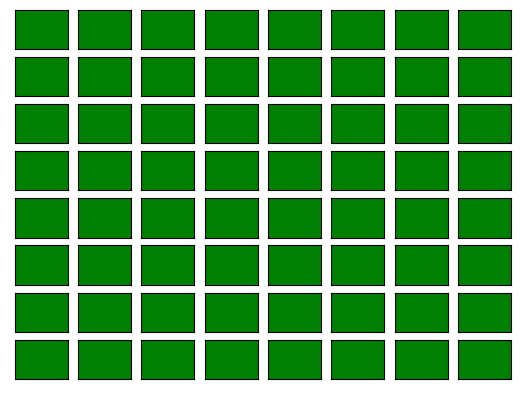

In [7]:
fig, axs = plt.subplots(8, 8)
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor("green")

## Tight layout

Ofte vil man ha figurene tett på hverandre. Da finnes det flere avanserte måter å gjøre det på, men en veldig lett en er `fig.tight_layout()`. Standard parametere er ganske gode, men i eksempelet under er det satt til ekstra lite padding

### Lagring av figurer

Når man lagrer figurer legger matplotlib inn ekstra padding. Dette er spesielt irriterende når man plotter bilder uten akser. For å fjerne disse kan man gjøre som i eksempelet under. Se forskjellene på de to lagrede bildene `vanlig.png` og `tett.png`

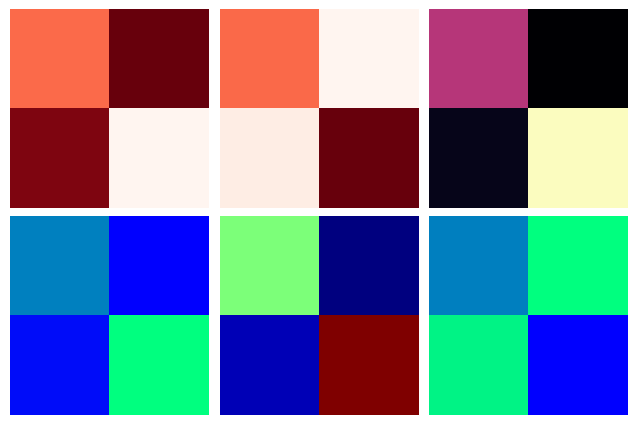

In [52]:
fig, axs = plt.subplots(2, 3)
cmaps=["Reds_r", "Reds", "magma", "winter", "jet", "winter_r", "gnuplot"]
for ax, cmap in zip(axs.flat, cmaps):
    ax.axis("off")
    ax.imshow([[1, 0], [0.1, 2]], cmap=cmap)
fig.tight_layout(pad=0.8, h_pad=-1.52)

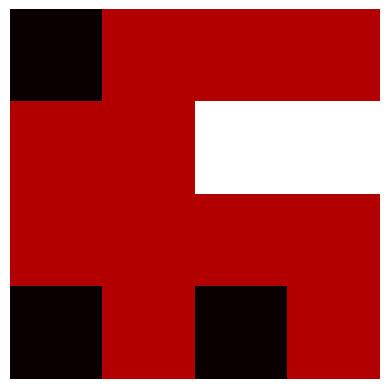

In [59]:
fig, ax = plt.subplots()
ax.axis("off")
ax.imshow([[0, 1, 1, 1],
        [1, 1, 4, 4],
        [1, 1, 1, 1],
        [0, 1, 0, 1]], cmap="hot")
fig.savefig("vanlig.png")
fig.savefig("tett.png", pad_inches=0, bbox_inches="tight")

## Mosaikk

Noen ganger har man figurer ikke skal legges ut som et grid, f.eks. dersom man har et oversiktsbilde med dataanalyse fra 

Text(10, 490, 'b')

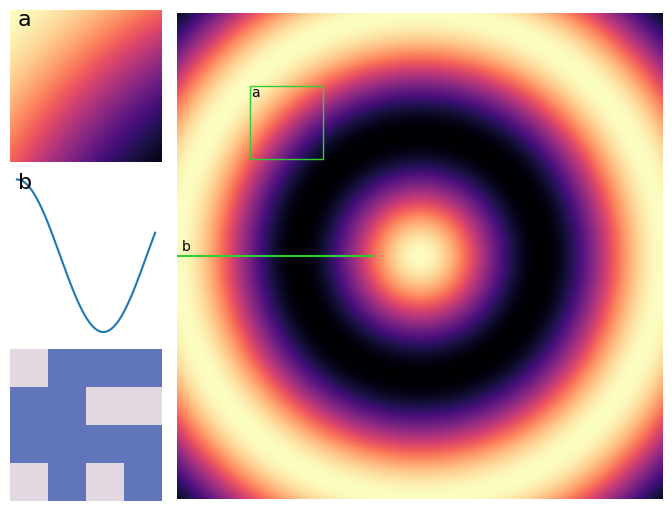

In [154]:

fig, axd = plt.subplot_mosaic(
    [
        ["Top left", "Middle", "Middle", "Middle"],
        ["Middle left", "Middle", "Middle", "Middle"],
        ["Bottom left", "Middle", "Middle", "Middle"],
    ]
)
fig.tight_layout(pad=-2)
## Det under er komplisert og er bare for å vise eksempel på hvordan dette kan brukes 

from matplotlib.patches import Rectangle
drawing = [[0, 1, 1, 1], [1, 1, 4, 4], [1, 1, 1, 1], [0, 1, 0, 1]]

[ax.axis("off") for ax in axd.values()]

xs = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
ys = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
xs, ys = np.meshgrid(xs, ys)
rs = np.sqrt(xs**2 + ys**2)

sliceptx, slicepty = 150, 150
slicelenx, sliceleny = 150, 150

linex, liney, linelen = 0, 500, 400
max = axd["Middle"].imshow(np.cos(rs), cmap="magma")
tax = axd["Top left"].imshow(np.cos(rs)[sliceptx:sliceptx+slicelenx, slicepty:slicepty+sliceleny], cmap="magma")
tax.set_clim(max.get_clim())
axd["Middle left"].plot(np.cos(rs)[linex:linex+linelen, liney])
axd["Bottom left"].imshow(drawing, cmap="twilight")

axd["Top left"].annotate("a", (0.05, 0.9), xycoords="axes fraction", fontsize=16)
axd["Middle left"].annotate("b", (0.05, 0.9), xycoords="axes fraction", fontsize=16)
axd["Middle"].annotate("a", (sliceptx+2, slicepty+22))
axd["Middle"].add_patch(Rectangle((sliceptx, slicepty), slicelenx, sliceleny, edgecolor="limegreen", facecolor="none"))

axd["Middle"].plot((linex, linex+linelen), (liney, liney), color="limegreen")
axd["Middle"].annotate("b", (linex+10, liney -10))


In [1]:
from helpers.ihf import show_ihf
show_ihf()

### Innholdsfortegnelse

- [Matplotlib grunnkurs](./_matplotlib_grunnkurs.ipynb)
- [Subplots](./subplots.ipynb)
- [2D data](./2d_data.ipynb)
- [Interaktive plots](./interaktive_plots.ipynb)